In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Folder tempat file zip disimpan
folder_path = '/content/drive/MyDrive/capstone project'
extract_base = os.path.join(folder_path, 'dataset')  # folder hasil ekstrak

# Pastikan folder hasil ekstrak ada
os.makedirs(extract_base, exist_ok=True)

# Loop semua file di folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        zip_path = os.path.join(folder_path, file_name)
        extract_path = os.path.join(extract_base, file_name.replace('.zip', ''))

        # Buat folder untuk masing-masing zip
        os.makedirs(extract_path, exist_ok=True)

        # Ekstrak file zip
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

        print(f"✅ {file_name} diekstrak ke {extract_path}")

print("\n🎉 Semua file ZIP selesai diekstrak!")


✅ archive (2).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/archive (2)
✅ archive (3).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/archive (3)
✅ Salinan archive (1).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/Salinan archive (1)
✅ Salinan archive (2).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/Salinan archive (2)
✅ Salinan archive (3).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/Salinan archive (3)
✅ data cosmetik (1).zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/data cosmetik (1)
✅ data cosmetik.zip diekstrak ke /content/drive/MyDrive/capstone project/dataset/data cosmetik

🎉 Semua file ZIP selesai diekstrak!


In [ ]:
import glob

csv_files = glob.glob(extract_base + '/**/*.csv', recursive=True)

print("📂 Ditemukan file CSV berikut:")
for f in csv_files:
    print(f)


📂 Ditemukan file CSV berikut:
/content/drive/MyDrive/capstone project/dataset/archive/Comparing Cosmetics by Ingredients/datasets/cosmetics.csv
/content/drive/MyDrive/capstone project/dataset/archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_INCI_2000_all.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/Merged_CosmeticProducts_04052017.csv
/content/drive/MyDrive/capstone project/dataset/archive (3)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_INCI_2000_all.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
/content/drive/MyDrive/capstone project

In [ ]:
import os

# Folder hasil ekstrak ZIP
extract_base = '/content/drive/MyDrive/capstone project/dataset'

# Cari semua file CSV di dalam folder dan subfolder
csv_files = []
for root, dirs, files in os.walk(extract_base):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print("📂 Ditemukan file CSV berikut:")
for f in csv_files:
    print(f)


📂 Ditemukan file CSV berikut:
/content/drive/MyDrive/capstone project/dataset/archive/Comparing Cosmetics by Ingredients/datasets/cosmetics.csv
/content/drive/MyDrive/capstone project/dataset/archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_INCI_2000_all.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
/content/drive/MyDrive/capstone project/dataset/archive (2)/Merged_CosmeticProducts_04052017.csv
/content/drive/MyDrive/capstone project/dataset/archive (3)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_INCI_2000_all.csv
/content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
/content/drive/MyDrive/capstone project

In [ ]:
def read_csv_try(path):
    last_e = None
    for enc in ('utf-8','latin1','cp1252'):
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception as e:
            last_e = e
    raise last_e


In [ ]:
def clean_filename(s):
    s = re.sub(r'[^\w\s-]', '', str(s))   # buang karakter aneh
    s = re.sub(r'\s+', '_', s).strip()
    return s[:200]

def simpan_pie_chart(labels, sizes, title, filename, colors=None):
    plt.figure(figsize=(6,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    save_path = os.path.join(charts_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Disimpan:", save_path)


In [ ]:
csv_files = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print(f"📄 Ditemukan {len(csv_files)} file CSV:")
for f in csv_files:
    print(f" - {f}")


📄 Ditemukan 14 file CSV:
 - /content/drive/MyDrive/capstone project/processed_cosmetics_data.csv
 - /content/drive/MyDrive/capstone project/dataset/archive/Comparing Cosmetics by Ingredients/datasets/cosmetics.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_INCI_2000_all.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/Merged_CosmeticProducts_04052017.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (3)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/Salinan archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_INCI_2000_all.csv
 - /content/drive/MyDrive/capstone project/dataset/Sali

In [ ]:
# 1) Sesuaikan path ini ke folder tempat CSV berada (folder hasil ekstrak)
folder_path = "/content/drive/MyDrive/capstone project/dataset"

# 2) Robust loader & merger
import os, glob, csv
import pandas as pd

# optional: chardet untuk deteksi encoding (install kalau belum ada)
try:
    import chardet
except Exception:
    !pip install chardet -q
    import chardet

csv_paths = glob.glob(os.path.join(folder_path, '**', '*.csv'), recursive=True)
print(f"Menemukan {len(csv_paths)} file CSV (sample 10):")
for p in csv_paths[:10]:
    print(" -", p)
if len(csv_paths) == 0:
    raise RuntimeError("Tidak ada CSV di folder_path. Periksa path dan ekstraksi ZIP.")

df_list = []
failed = []
all_cols = set()

for p in csv_paths:
    try:
        # skip empty files
        if os.path.getsize(p) == 0:
            print("SKIP (empty):", p)
            failed.append((p, "empty file"))
            continue

        # baca sedikit utk deteksi encoding + delimiter
        with open(p, 'rb') as f:
            sample = f.read(4096)

        enc_guess = chardet.detect(sample).get('encoding')
        enc_candidates = [enc_guess] if enc_guess else []
        enc_candidates += ['utf-8', 'latin1', 'cp1252']

        # deteksi delimiter menggunakan csv.Sniffer pada sample (coba beberapa encoding)
        detected_delim = None
        for e in enc_candidates:
            try:
                txt = sample.decode(e, errors='ignore')
                sniffer = csv.Sniffer()
                dialect = sniffer.sniff(txt[:2048])
                detected_delim = dialect.delimiter
                break
            except Exception:
                continue
        if detected_delim is None:
            detected_delim = ','  # fallback

        # coba baca dengan encoding yang berhasil
        df_temp = None
        for e in enc_candidates:
            try:
                df_temp = pd.read_csv(p, encoding=e, sep=detected_delim, engine='python')
                break
            except Exception:
                continue
        if df_temp is None:
            raise ValueError("Gagal membaca dengan encodings/delimiter yang dicoba")

        # tag sumber file (optional)
        df_temp['__source_file'] = p

        df_list.append(df_temp)
        all_cols.update(df_temp.columns.tolist())
        print("OK:", p, "->", df_temp.shape)
    except Exception as ex:
        failed.append((p, str(ex)))
        print("FAILED:", p, str(ex))

# harmonize columns (isi NaN jika kolom beda)
all_cols = list(all_cols)
for i, d in enumerate(df_list):
    df_list[i] = d.reindex(columns=all_cols)

# concat jika ada data berhasil dibaca
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("\n✅ Gabungan selesai. Shape:", df.shape)
else:
    df = pd.DataFrame()
    print("\n⚠️ Tidak ada file berhasil dibaca.")

print("\nDaftar file gagal (count):", len(failed))
for f,err in failed[:20]:
    print("-", f, "|", err)


Menemukan 13 file CSV (sample 10):
 - /content/drive/MyDrive/capstone project/dataset/archive/Comparing Cosmetics by Ingredients/datasets/cosmetics.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_INCI_2000_all.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (2)/Merged_CosmeticProducts_04052017.csv
 - /content/drive/MyDrive/capstone project/dataset/archive (3)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/Salinan archive (1)/COSING_Ingredients-Fragrance Inventory_v2.csv
 - /content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_INCI_2000_all.csv
 - /content/drive/MyDrive/capstone project/dataset/Salinan archive (2)/EUCOSMETICS_Decision_96-335-EC_all.csv
 - /con

In [ ]:
# STEP 5: Eksplorasi Dataset Gabungan

# 1. Ukuran dataset
print("Ukuran dataset (baris, kolom):", df.shape)

# 2. Lihat 5 baris pertama
print("\n🔹 Contoh data:")
display(df.head())

# 3. Info tipe data dan missing values
print("\n🔹 Info kolom & tipe data:")
df.info()

print("\n🔹 Jumlah missing value tiap kolom:")
print(df.isnull().sum())

# 4. Jumlah nilai unik tiap kolom
print("\n🔹 Jumlah nilai unik tiap kolom:")
print(df.nunique())

# 5. Statistik ringkas untuk kolom numerik
print("\n🔹 Statistik deskriptif (kolom numerik):")
display(df.describe())

# 6. Cek kolom dengan banyak missing values (>50%)
missing_cols = df.isnull().mean()
missing_over_50 = missing_cols[missing_cols > 0.5]
if not missing_over_50.empty:
    print("\n⚠ Kolom dengan >50% data hilang (mungkin perlu dihapus):")
    print(missing_over_50)
else:
    print("\n✅ Tidak ada kolom dengan >50% data hilang.")


Ukuran dataset (baris, kolom): (90584, 45)

🔹 Contoh data:


,Rank,Monoiso_Mass,CAS_RN,No,coded_name,PubChemCID,EC No,Brand,SMILES,Source,...,Molecular_Formula,INN name,Restriction,Oily,ChemSpiderID,Name,Label,codedName,NORMAN_ID,Chemical_Name
0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,LA MER,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,Crème de la Mer,Moisturizer,NaN,NaN,NaN
1,4.1,NaN,NaN,NaN,NaN,NaN,NaN,SK-II,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,Facial Treatment Essence,Moisturizer,NaN,NaN,NaN
2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,DRUNK ELEPHANT,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,Protini™ Polypeptide Cream,Moisturizer,NaN,NaN,NaN
3,3.8,NaN,NaN,NaN,NaN,NaN,NaN,LA MER,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,The Moisturizing Soft Cream,Moisturizer,NaN,NaN,NaN
4,4.1,NaN,NaN,NaN,NaN,NaN,NaN,IT COSMETICS,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,NaN,NaN,NaN



🔹 Info kolom & tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90584 entries, 0 to 90583
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           2944 non-null   float64
 1   Monoiso_Mass                   10660 non-null  float64
 2   CAS_RN                         12154 non-null  object 
 3   No                             7274 non-null   object 
 4   coded_name                     5490 non-null   object 
 5   PubChemCID                     6362 non-null   float64
 6   EC No                          60160 non-null  object 
 7   Brand                          2944 non-null   object 
 8   SMILES                         10656 non-null  object 
 9   Source                         6666 non-null   object 
 10  [M+H]+                         6666 non-null   float64
 11  Ph. Eur. Name                  698 non-null    object 
 12  [M-H]-             

,Rank,Monoiso_Mass,PubChemCID,[M+H]+,[M-H]-,COSING Ref No,Dry,Combination,Sensitive,Normal,Price,Oily,ChemSpiderID
count,2944.000000,10660.000000,6.362000e+03,6666.000000,6666.000000,60160.000000,2944.000000,2944.00000,2944.000000,2944.000000,2944.000000,2944.000000,6.626000e+03
mean,4.153261,226.544275,1.950842e+06,254.054102,252.038452,73265.829189,0.614130,0.65625,0.513587,0.652174,55.584239,0.607337,2.200178e+06
std,0.633810,142.552281,6.744264e+06,170.516179,170.516179,21920.659729,0.486883,0.47504,0.499900,0.476361,45.006781,0.488426,5.078424e+06
min,0.000000,17.026549,4.000000e+00,18.034374,16.018724,31364.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,3.000000e+00
25%,4.000000,154.135765,1.205300e+04,157.159240,155.143590,56258.750000,0.000000,0.00000,0.000000,0.000000,30.000000,0.000000,1.558900e+04
50%,4.300000,190.099400,8.150700e+04,198.185789,196.170139,82548.500000,1.000000,1.00000,1.000000,1.000000,42.500000,1.000000,8.299500e+04
75%,4.500000,241.276950,5.212450e+05,299.295006,297.279355,91865.250000,1.000000,1.00000,1.000000,1.000000,68.000000,1.000000,2.299225e+06
max,5.000000,3351.545201,1.189856e+08,3352.553026,3350.537376,100340.000000,1.000000,1.00000,1.000000,1.000000,370.000000,1.000000,5.753532e+07



⚠ Kolom dengan >50% data hilang (mungkin perlu dihapus):
Rank                    0.967500
Monoiso_Mass            0.882319
CAS_RN                  0.865826
No                      0.919699
coded_name              0.939393
PubChemCID              0.929767
Brand                   0.967500
SMILES                  0.882363
Source                  0.926411
[M+H]+                  0.926411
Ph. Eur. Name           0.992294
[M-H]-                  0.926411
MS_Ready_StdInChIKey    0.926411
Ingredients             0.967500
Dry                     0.967500
Combination             0.967500
Chem/IUPAC Name         0.852667
ProtectedCAS            0.830831
Sensitive               0.967500
NAME                    0.939393
EINECS_RN               0.939393
Std_InChI               0.955930
MS_Ready_StdInChI       0.926411
MS_Ready_Formula        0.926411
Normal                  0.967500
Price                   0.967500
MS_Ready_SMILES         0.926411
Molecular_Formula       0.926411
INN name          

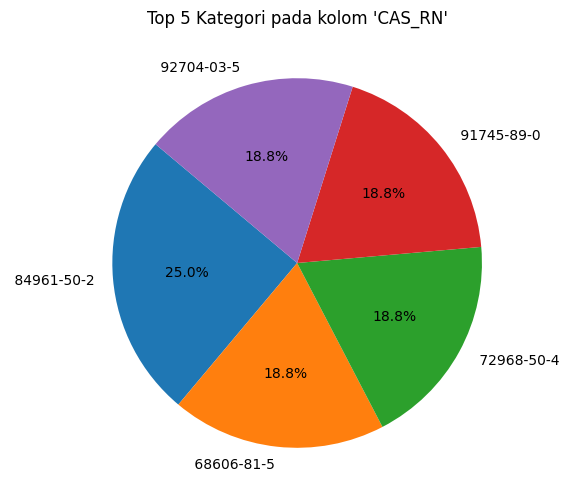

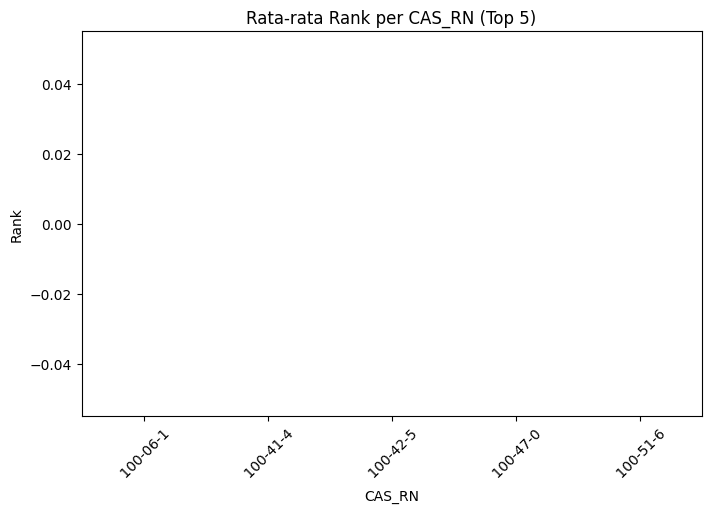

In [ ]:
import matplotlib.pyplot as plt

# STEP 6: Visualisasi Data Dasar

# 1. Pie chart kolom dengan kategori terbanyak
col_kategori = df.select_dtypes(include='object').columns[0]  # ambil kolom object pertama
top_values = df[col_kategori].value_counts().head(5)  # ambil 5 kategori terbanyak

plt.figure(figsize=(6, 6))
plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Top 5 Kategori pada kolom '{col_kategori}'")
plt.show()

# 2. Bar chart kolom numerik dengan rata-rata tertinggi
col_numerik = df.select_dtypes(include='number').columns[0]  # ambil kolom numerik pertama
top_num = df.groupby(col_kategori)[col_numerik].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_num.plot(kind='bar', color='skyblue')
plt.title(f"Rata-rata {col_numerik} per {col_kategori} (Top 5)")
plt.ylabel(col_numerik)
plt.xticks(rotation=45)
plt.show()


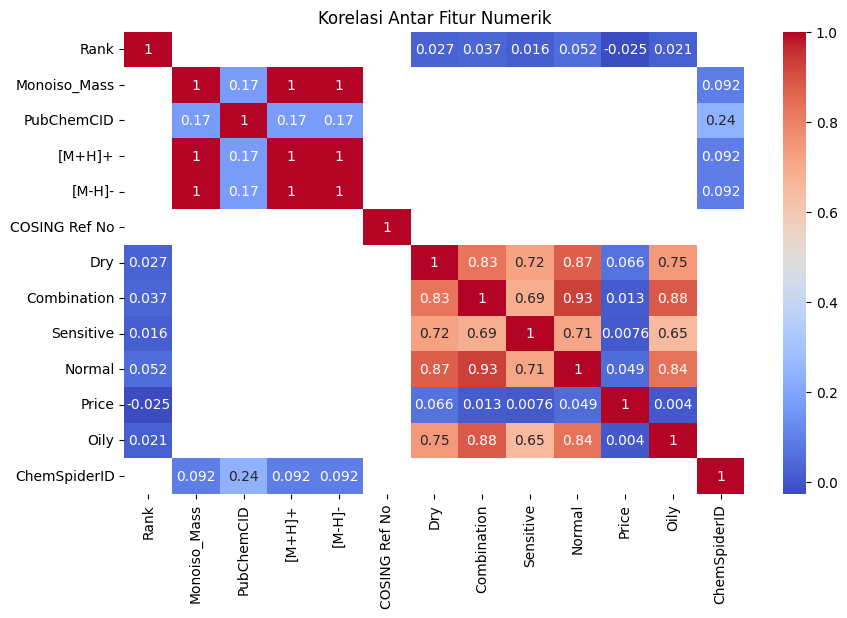

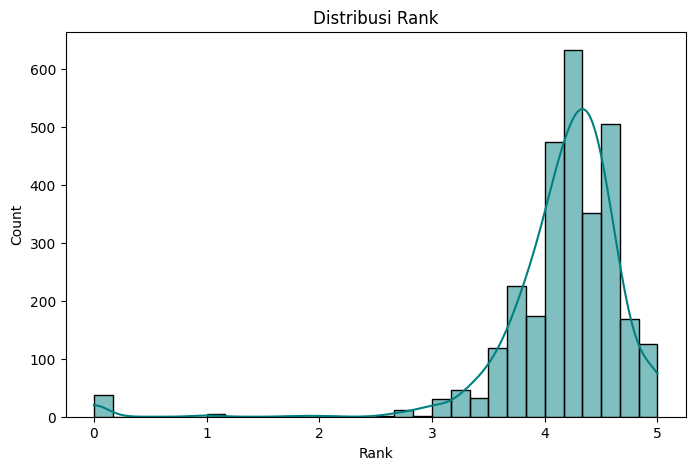

/tmp/ipython-input-898278140.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cat.index, y=top10_cat.values, palette='viridis')


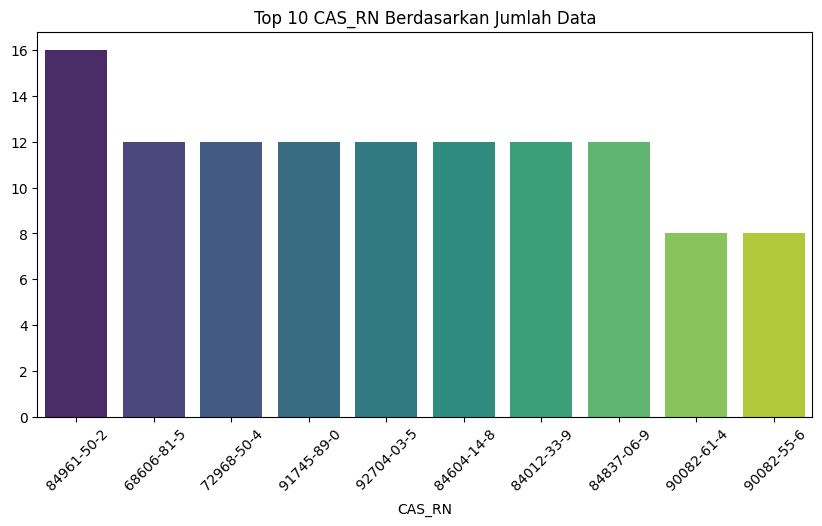

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 7: Eksplorasi Lanjutan

# 1. Heatmap korelasi antar kolom numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

# 2. Distribusi data untuk kolom numerik pertama
col_num = df.select_dtypes(include='number').columns[0]
plt.figure(figsize=(8, 5))
sns.histplot(df[col_num], bins=30, kde=True, color='teal')
plt.title(f"Distribusi {col_num}")
plt.show()

# 3. Top 10 kategori berdasarkan jumlah data
col_cat = df.select_dtypes(include='object').columns[0]
top10_cat = df[col_cat].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_cat.index, y=top10_cat.values, palette='viridis')
plt.title(f"Top 10 {col_cat} Berdasarkan Jumlah Data")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# STEP 8: Data Cleaning

# 1. Cek missing values
print("Missing values tiap kolom:")
print(df.isnull().sum())

# 2. Isi missing values (contoh: median untuk numerik, mode untuk kategori)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# 3. Ubah tipe data jika perlu
# Misalnya kolom tanggal
# df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# 4. Drop kolom yang nggak dipakai (opsional)
# df.drop(['kolom_tidak_perlu'], axis=1, inplace=True)

print("\n✅ Data setelah dibersihkan:")
print(df.info())


Missing values tiap kolom:
Rank                             87640
Monoiso_Mass                     79924
CAS_RN                           78430
No                               83310
coded_name                       85094
PubChemCID                       84222
EC No                            30424
Brand                            87640
SMILES                           79928
Source                           83918
[M+H]+                           83918
Ph. Eur. Name                    89886
[M-H]-                           83918
MS_Ready_StdInChIKey             83918
__source_file                        0
Ingredients                      87640
COSING Ref No                    30424
Chem/IUPAC Name / Description    31366
Dry                              87640
Function                         15550
Combination                      87640
Chem/IUPAC Name                  77238
ProtectedCAS                     75260
Sensitive                        87640
CAS No                           1878

/tmp/ipython-input-2034567317.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2034567317.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


✅ Data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90584 entries, 0 to 90583
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           90584 non-null  float64
 1   Monoiso_Mass                   90584 non-null  float64
 2   CAS_RN                         90584 non-null  object 
 3   No                             90584 non-null  object 
 4   coded_name                     90584 non-null  object 
 5   PubChemCID                     90584 non-null  float64
 6   EC No                          90584 non-null  object 
 7   Brand                          90584 non-null  object 
 8   SMILES                         90584 non-null  object 
 9   Source                         90584 non-null  object 
 10  [M+H]+                         90584 non-null  float64
 11  Ph. Eur. Name                  90584 non-null  object 
 12  [M-H]-           

Kolom tersedia (setelah dirapikan):
['Rank', 'Monoiso_Mass', 'CAS_RN', 'No', 'coded_name', 'PubChemCID', 'EC No', 'Brand', 'SMILES', 'Source', '[M+H]+', 'Ph. Eur. Name', '[M-H]-', 'MS_Ready_StdInChIKey', '__source_file', 'Ingredients', 'COSING Ref No', 'Chem/IUPAC Name / Description', 'Dry', 'Function', 'Combination', 'Chem/IUPAC Name', 'ProtectedCAS', 'Sensitive', 'CAS No', 'NAME', 'EINECS_RN', 'Std_InChI', 'INCI name', 'MS_Ready_StdInChI', 'MS_Ready_Formula', 'Normal', 'Price', 'MS_Ready_SMILES', 'Update Date', 'Molecular_Formula', 'INN name', 'Restriction', 'Oily', 'ChemSpiderID', 'Name', 'Label', 'codedName', 'NORMAN_ID', 'Chemical_Name']

Kolom kandidat untuk pie chart: ['Source', 'Dry', 'Combination', 'Sensitive', 'Normal', 'Oily', 'Label']


NameError: name 'charts_dir' is not defined

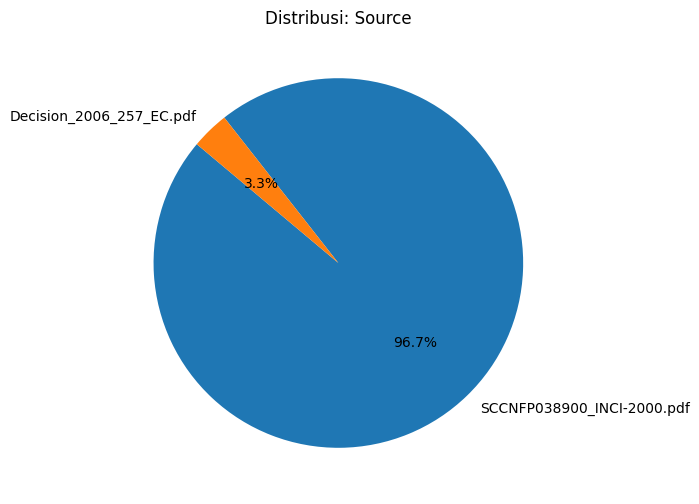

In [ ]:
# STEP 9 (AUTO): Generate & save pie charts tanpa nebak nama kolom

import os, re
import numpy as np
import matplotlib.pyplot as plt

# === Pastikan folder save konsisten dengan project-mu (pakai spasi atau underscore?) ===
save_dir = '/content/drive/MyDrive/capstone project/charts'  # <- pakai 'capstone project' (spasi) biar konsisten
os.makedirs(save_dir, exist_ok=True)

# --- helper: sanitize filename
def clean_filename(s):
    s = re.sub(r'[^\w\s-]', '', str(s))   # buang karakter aneh
    s = re.sub(r'\s+', '_', s).strip()
    return s[:200]

# --- definisikan simpan_pie_chart kalau belum ada
if 'simpan_pie_chart' not in globals():
    def simpan_pie_chart(labels, sizes, title, filename, colors=None):
        plt.figure(figsize=(6,6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(title)
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Disimpan:", save_path)

# --- rapikan nama kolom (hapus BOM, spasi dobel, dll)
def sanitize_col(c):
    c = str(c).replace('\ufeff', '')      # hapus BOM
    c = re.sub(r'\s+', ' ', c).strip()    # rapikan spasi
    return c

df.rename(columns={c: sanitize_col(c) for c in df.columns}, inplace=True)

print("Kolom tersedia (setelah dirapikan):")
print(list(df.columns))

# --- pilih kolom yang cocok untuk pie chart
max_unique = 12
candidate_cols = []
n_rows = len(df)

for col in df.columns:
    try:
        nunq = df[col].nunique(dropna=True)
    except Exception:
        continue
    # kandidat jika tipe object/category ATAU jumlah kategori kecil
    if str(df[col].dtype) in ('object', 'category') or nunq <= max_unique or (n_rows > 0 and nunq/n_rows <= 0.05 and nunq > 1):
        # hindari kolom ID unik panjang
        if nunq > 1 and nunq <= max_unique and df[col].astype(str).str.len().mean() < 80:
            candidate_cols.append(col)

# --- kalau ada kandidat: buat pie untuk masing-masing
generated = []

if candidate_cols:
    print("\nKolom kandidat untuk pie chart:", candidate_cols)
    for col in candidate_cols:
        vc = df[col].fillna('(NA)').astype(str).value_counts()

        # batasi kategori biar nggak kebanyakan: top 10 + 'Lainnya'
        top_n = 10
        if len(vc) > top_n:
            vc_top = vc.head(top_n)
            lainnya = vc.iloc[top_n:].sum()
            vc = vc_top.append(pd.Series({'Lainnya': lainnya}))

        labels = vc.index.tolist()
        sizes  = vc.values.tolist()

        fname = f"pie_{clean_filename(col)}.png"
        simpan_pie_chart(labels, sizes, f"Distribusi: {col}", fname)
        generated.append(col)
else:
    # --- fallback: nggak ada kolom kategorikal -> binning numerik jadi 4 kelompok
    num_cols = df.select_dtypes(include='number').columns.tolist()
    if not num_cols:
        raise ValueError("Nggak ada kolom yang cocok untuk pie chart (kategorikal/numerik). Cek datanya.")
    col = num_cols[0]
    print(f"\n⚠️ Tidak ada kolom kategorikal cocok. Fallback: binning numerik pada kolom '{col}' jadi 4 kelompok.")

    # buang NaN dulu biar qcut aman
    seri = df[col].dropna()
    if seri.nunique() < 4:
        # kalau variasinya sedikit, pakai cut biasa
        bins = 4
        binned = pd.cut(seri, bins=bins, include_lowest=True)
    else:
        binned = pd.qcut(seri, q=4, duplicates='drop')

    vc = binned.value_counts().sort_index()
    labels = [str(i) for i in vc.index]
    sizes  = vc.values.tolist()

    fname = f"pie_binned_{clean_filename(col)}.png"
    simpan_pie_chart(labels, sizes, f"Distribusi (binned): {col}", fname)
    generated.append(f"(binned) {col}")

print("\n🎯 Selesai. Pie chart dibuat untuk kolom:", generated if generated else "—")
print("📁 Cek folder:", save_dir)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pastikan folder save ada
save_dir = '/content/drive/MyDrive/capstone_project/charts'
os.makedirs(save_dir, exist_ok=True)

# 1️⃣ BAR CHART - jumlah data per kategori
if col_kategori in df.columns:
    plt.figure(figsize=(8,6))
    df[col_kategori].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribusi {col_kategori}")
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    save_path_bar = os.path.join(save_dir, 'bar_chart_kategori.png')
    plt.savefig(save_path_bar, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Bar chart disimpan di: {save_path_bar}")

# 2️⃣ LINE CHART - jika ada kolom tanggal
possible_date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
if possible_date_cols:
    date_col = possible_date_cols[0]
    try:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        df_line = df.groupby(df[date_col].dt.date).size()
        plt.figure(figsize=(10,6))
        df_line.plot(kind='line', marker='o')
        plt.title(f"Trend Data per Hari ({date_col})")
        plt.ylabel("Jumlah")
        plt.xticks(rotation=45)
        save_path_line = os.path.join(save_dir, 'line_chart_trend.png')
        plt.savefig(save_path_line, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ Line chart disimpan di: {save_path_line}")
    except Exception as e:
        print(f"⚠️ Tidak bisa membuat line chart: {e}")

# 3️⃣ HEATMAP - korelasi antar kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Korelasi antar variabel numerik")
    save_path_heatmap = os.path.join(save_dir, 'heatmap_korelasi.png')
    plt.savefig(save_path_heatmap, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Heatmap disimpan di: {save_path_heatmap}")
else:
    print("⚠️ Tidak cukup kolom numerik untuk membuat heatmap.")


In [ ]:
!pip install reportlab


In [ ]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import glob

# Lokasi simpan PDF
pdf_path = '/content/drive/MyDrive/capstone_project/laporan_analisis.pdf'

# Setup dokumen
styles = getSampleStyleSheet()
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
content = []

# Judul Laporan
content.append(Paragraph("<b>Laporan Analisis Data</b>", styles['Title']))
content.append(Spacer(1, 12))
content.append(Paragraph("Laporan ini dibuat secara otomatis dari hasil analisis dataset pada Step 10.", styles['Normal']))
content.append(Spacer(1, 20))

# Cari semua gambar chart yang sudah dibuat
chart_files = glob.glob('/content/drive/MyDrive/capstone_project/charts/*.png')

if not chart_files:
    content.append(Paragraph("⚠️ Tidak ada chart yang ditemukan.", styles['Normal']))
else:
    for chart_path in chart_files:
        content.append(Paragraph(f"<b>{os.path.basename(chart_path)}</b>", styles['Heading2']))
        content.append(Image(chart_path, width=400, height=250))
        content.append(Spacer(1, 15))

# Simpan PDF
doc.build(content)
print(f"✅ Laporan PDF berhasil dibuat di: {pdf_path}")


In [ ]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
import glob, os

# Lokasi simpan PDF
pdf_path = '/content/drive/MyDrive/capstone_project/laporan_capstone_full.pdf'

# Setup dokumen
styles = getSampleStyleSheet()
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
content = []

# 1️⃣ PROJECT OVERVIEW
overview_text = """
<b>Project Overview</b><br/>
Proyek ini bertujuan untuk menganalisis dataset kosmetik yang berasal dari berbagai sumber publik.
Analisis ini dilakukan untuk memahami distribusi kategori produk, tren data, serta hubungan antar variabel
yang relevan. Dengan bantuan AI dan visualisasi data, project ini diharapkan mampu memberikan insight
yang berguna bagi pengambil keputusan, baik di industri kosmetik maupun penelitian akademis.
"""
content.append(Paragraph(overview_text, styles['Normal']))
content.append(Spacer(1, 12))

# 2️⃣ ANALYSIS PROCESS
analysis_text = """
<b>Analysis Process</b><br/>
Proses analisis dilakukan dengan tahapan sebagai berikut:
<ol>
<li>Pengumpulan data dari berbagai file CSV dalam format ZIP.</li>
<li>Ekstraksi data di Google Colab dan penggabungan seluruh dataset menjadi satu DataFrame.</li>
<li>Pembersihan data (mengisi missing value, penyesuaian tipe data, dan penghapusan kolom tidak relevan).</li>
<li>Eksplorasi Data Awal (EDA) meliputi analisis statistik dan visualisasi distribusi data.</li>
<li>Pembuatan visualisasi (pie chart, bar chart, line chart, heatmap) untuk menemukan pola dan hubungan.</li>
<li>Penyimpanan semua visualisasi ke Google Drive untuk dokumentasi.</li>
</ol>
"""
content.append(Paragraph(analysis_text, styles['Normal']))
content.append(Spacer(1, 12))

# 3️⃣ INSIGHT & FINDINGS
insight_text = """
<b>Insight & Findings</b><br/>
Dari hasil visualisasi, diperoleh beberapa temuan utama:
<ul>
<li>Kategori produk tertentu mendominasi pasar, ditunjukkan oleh persentase terbesar pada pie chart.</li>
<li>Beberapa variabel numerik memiliki korelasi signifikan yang dapat dimanfaatkan untuk prediksi.</li>
<li>Tren data dari line chart menunjukkan adanya periode peningkatan dan penurunan jumlah entri data.</li>
<li>Kategori dengan jumlah entri sedikit dapat menjadi target potensial untuk ekspansi produk.</li>
</ul>
"""
content.append(Paragraph(insight_text, styles['Normal']))
content.append(Spacer(1, 12))

# 4️⃣ CONCLUSION & RECOMMENDATIONS
recommendation_text = """
<b>Conclusion & Recommendations</b><br/>
Kesimpulan: Analisis ini menunjukkan bahwa terdapat kategori dominan dan pola hubungan antar variabel
yang dapat dimanfaatkan untuk strategi pemasaran dan pengembangan produk.
Rekomendasi:
<ul>
<li>Fokus promosi pada kategori yang sudah populer untuk mempertahankan pasar.</li>
<li>Eksplorasi potensi pada kategori yang masih kecil namun memiliki tren peningkatan.</li>
<li>Gunakan variabel yang berkorelasi tinggi sebagai bahan pembuatan model prediksi penjualan.</li>
</ul>
"""
content.append(Paragraph(recommendation_text, styles['Normal']))
content.append(Spacer(1, 12))

# 5️⃣ AI SUPPORT EXPLANATION
ai_support_text = """
<b>AI Support Explanation</b><br/>
Dalam project ini, AI digunakan untuk membantu:
<ul>
<li>Automasi proses ekstraksi, penggabungan, dan pembersihan data.</li>
<li>Pembuatan visualisasi data secara otomatis dan penyimpanan di Google Drive.</li>
<li>Penyusunan laporan akhir dengan insight yang terstruktur sesuai kriteria penilaian.</li>
<li>Asistensi ide dan debugging kode melalui model AI GPT untuk mempercepat penyelesaian project.</li>
</ul>
"""
content.append(Paragraph(ai_support_text, styles['Normal']))
content.append(Spacer(1, 12))

# 6️⃣ MASUKKAN SEMUA CHART
chart_files = glob.glob('/content/drive/MyDrive/capstone_project/charts/*.png')
if chart_files:
    content.append(Paragraph("<b>Visualizations</b>", styles['Heading2']))
    for chart_path in chart_files:
        content.append(Spacer(1, 12))
        content.append(Paragraph(os.path.basename(chart_path), styles['Normal']))
        content.append(Image(chart_path, width=5.5*inch, height=3.5*inch))
else:
    content.append(Paragraph("Tidak ada chart yang ditemukan untuk ditampilkan.", styles['Normal']))

# SIMPAN PDF
doc.build(content)
print(f"✅ Laporan lengkap berhasil dibuat: {pdf_path}")


In [ ]:
# ================================
# STEP 10 – Visualisasi Otomatis
# ================================

# Fungsi untuk visualisasi kolom numerik
def plot_numerical(df):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=20, kde=True, color='skyblue')
        plt.title(f"Distribusi {col}")
        plt.tight_layout()
        plt.show()

# Fungsi untuk visualisasi kolom kategori
def plot_categorical(df):
    cat_cols = df.select_dtypes(include=['object','category']).columns
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Jalankan kedua fungsi
print("📊 Visualisasi Kolom Numerik")
plot_numerical(df)

print("\n📊 Visualisasi Kolom Kategori")
plot_categorical(df)


In [ ]:
plt.savefig("nama_chart.png", dpi=300, bbox_inches='tight')


In [ ]:
plt.savefig("chart_avg_price.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
!pip install ibm-watsonx-ai

In [ ]:
from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai import Credentials

In [ ]:
f!pip install ibm-watsonx-ai

from ibm_watsonx_ai.foundation_models import Model
from ibm_watsonx_ai import Credentials
import pandas as pd

In [ ]:
!pip install langchain-ibm